# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [6]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:** The smartcab is still, it doesn't seem to move. When there is a red light in front of it, the car is rewarded positively for staying idle (about +1.5). When the light is green, if there is no oncoming traffic, the car is rewarded negatively for staying idle (about -4.5). When the light is green but there is oncoming traffic, the car is rewarded positively for staying idle (about +1.0).

All the rewards seem to be coherent: the car should be idle if there is a red light or oncoming traffic, but not otherwise.

 ### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**
- In agent.py:
    - "learning" flag, in LearningAgent class: If set to true, the agent would use Q-learning (that is not implemented yet, though).
    - "num_dummies": It is an integer number that determines how many "dummy" cars there will be in the simulation.
    - "enforce_deadline": When set to true, the hard_time_limit variable determines the maximum amount of time to get to the target place.

- In environment.py: The function called when an agent performs an action is "act(self,agent,action)"

- In simulator.py: "render_text" displays messages in the non-gui interface of the simulation, while "render" displays the GUI interface. The "display" flag controls if both functions are called, or only "render_text".

- It considers the "East-West" direction first.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!


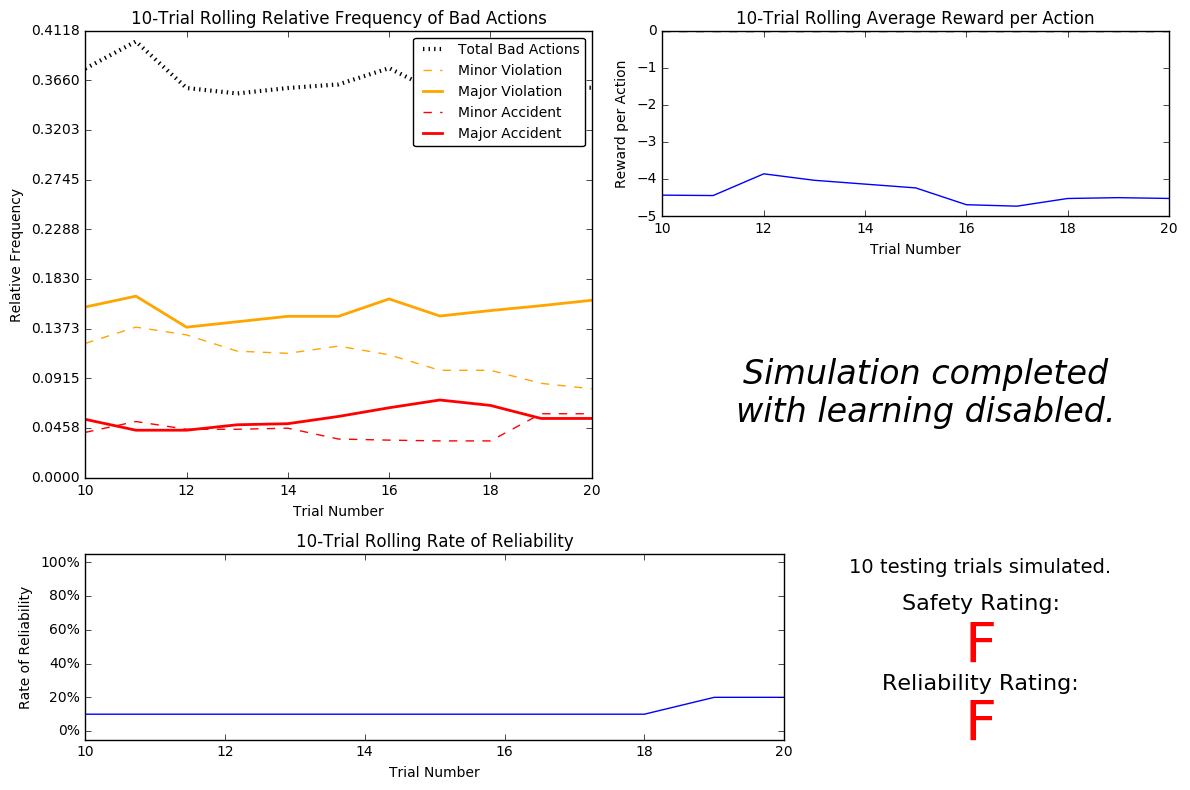

In [7]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:** The car is making bad decisions about 37% of the time. About 5% of its decisions are causing minor accidents, and another 5% of its decisions cause major accidents.

The rate of reliability is between 0% and 20%. That means that the agent was able to get to its destination in time, even when driving randomly. Those reliability values are too low to be even considered. That is well designed in the Reliability Rating, that only differentiates above a 60% rate.

The agent is receiving very negative rewards (between -5 and -4) on average. As its bad actions are not so many (about 37%), that means that it has been penalized heavily, very probably due to the major and minor accidents (other bad actions never rewarded much less than -5).

As the number of trials increases the outcome of the results don't seem to change significantly. That is reasonable, since the car is driving totally randomly (uniform distribution over actions), and the environment is supposed to be stationary.

This Smarcab is not to be considered safe or reliable. It's Safety Rating and Reliability Rating are both "F", which is the worst possible rating, in both categories.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:** The feature "waypoint" is relevant for learning efficiency. The features "light", "left" and "oncoming" are relevant for learning safety. Of course there is interdependence between both objectives, and in fact, depending on the situation, both safety and efficiency can be influenced by any of the features (not all combinations, though).

Those features are appropriate for modeling the Smartcab in the environment because given a set of values for the "inputs", it is possible to estimate what would be the outcome of any action the Smarcab takes next (and so calculate an estimated reward based on that). The other two features ("waypoint" and "deadline") act as the driving forces behind the actions of the Smartcab: the cab "wants" to get somewhere, and it "wants" to get there before the time runs out.

I did not choose the feature "right" because there is no traffic rule requiring that knowledge in order to make a decision. It could be useful if the possibility of another car not following the rules is considered, but I will assume that is not the case on this project. So, there would be no change in the policy by knowing the value of "right".

The feature "deadline" would be very relevant for efficiency if the rules of the game were different, for example if the smartcab was allowed to break some traffic rules at a penalty. But the smartcab is enforced to follow the traffic rules: all the illegal movements are taken by the simulator as "attempts", and never get really done. So there is no time gain from not following the rules (what a normal person could do in an emergency, for example; maybe that is in the rules, in fact, but it is an exception, anyway). The smartcab has no knowledge of the entire streets topology, or the streets' estimated traffic, so it can't either choose between a "safer path", and a "faster path". It could choose to follow or not to follow the "waypoint", in the case that there is a risk of accident if doing so, but I believe that will not be a very relevant situation, overall. In any case, originally, "deadline" has potentially infinite values and that could be a problem, which has a relatively simple solution: as the higher values for "deadline" are not important (we are in a finite world, and having time to go through the largest distance is very similar to having infinite time), the solution is to consider only a finite amount of values for "deadline". For example: 1,2,3,4,5,6,7,8,9,"a lot", or maybe: 1,2,3,4,5,6 to 10, 11 to 20, 20 to 50, "a lot".

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:** 
- "waypoint": 3 possible states
- "light": 2 possible states
- "left": 4 possible states
- "oncoming": 4 possible states

Then, the size of the state space would be: 3x2x4x4 = 96

I think it is a reasonable size for the state space, and that the driving agent could learn a policy for at least the relevant states, within a reasonable number of training trials. For example with 1000 trials, and 10 actions per trial, the smartcab would have done 10000 actions, that is 100 actions per possible state, if they were uniformly distributed.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

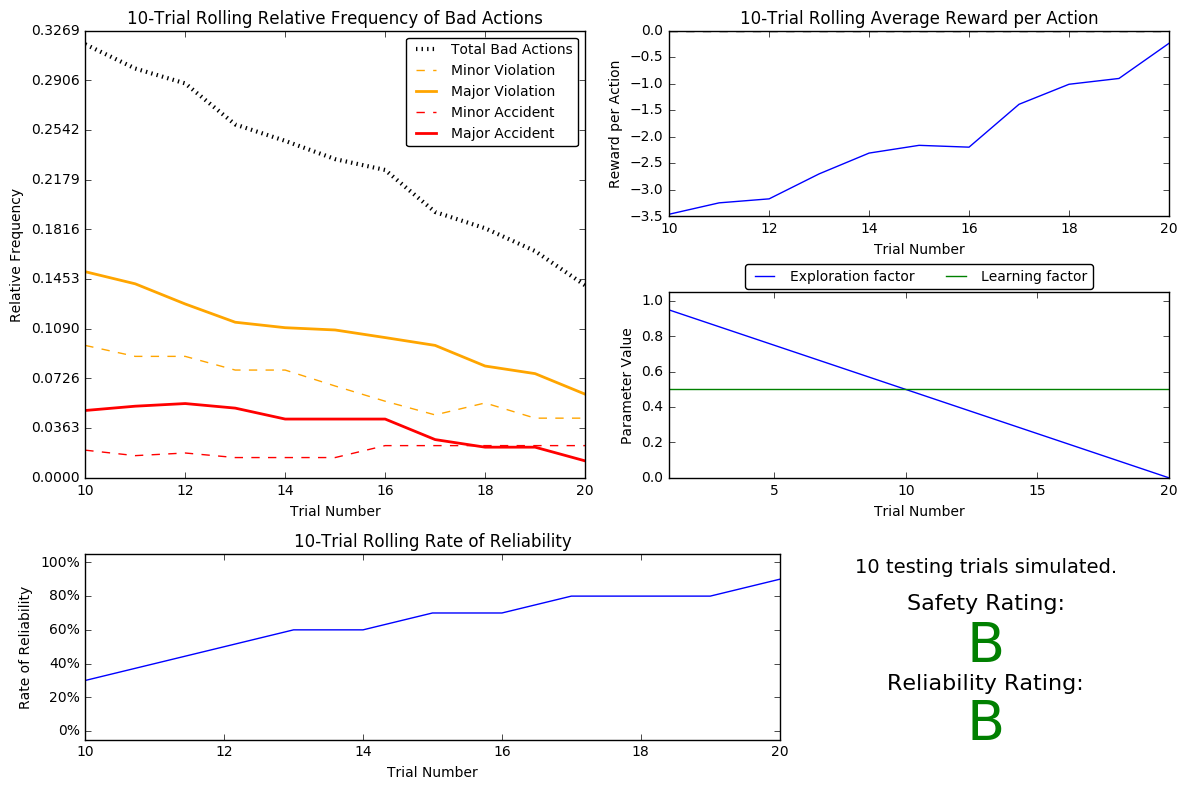

In [8]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:** The initial frequencies of Bad Actions, Minor/Major Violations, Minor/Major Accidents are similar between the basic driving agent and the default Q-Learning agent. After some trials that changes.

The driving agent required 20 training trials before testing. Epsilon starts at 1.0, and substracts 0.05 before each trial. Then 0.05*20 = 1.0, and 20 substractions are necessary to get epsilon to be less than 0.05 (the epsilon-tolerance). The first epsilon would be 0.95, and the last would be 0.0 . But when epsilon is 0.0, the "epsilon < epsilon-tolerance" rule should make the simulator not to run the trial. So if it was only for that rule, there would be 19 trials before testing. There are 20 because there's a minimum of 20 trials hardcoded in the simluator.py file.

The decaying function that was implemented can be seen in the second plot on the right. The linearly decreasing line that can be seen there accurately represents it.

As the number of training trials increased the number of bad action decreased and the average reward increased.

The safety and reliability ratings are much better than in the initial driving agent, but can still be improved a lot.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

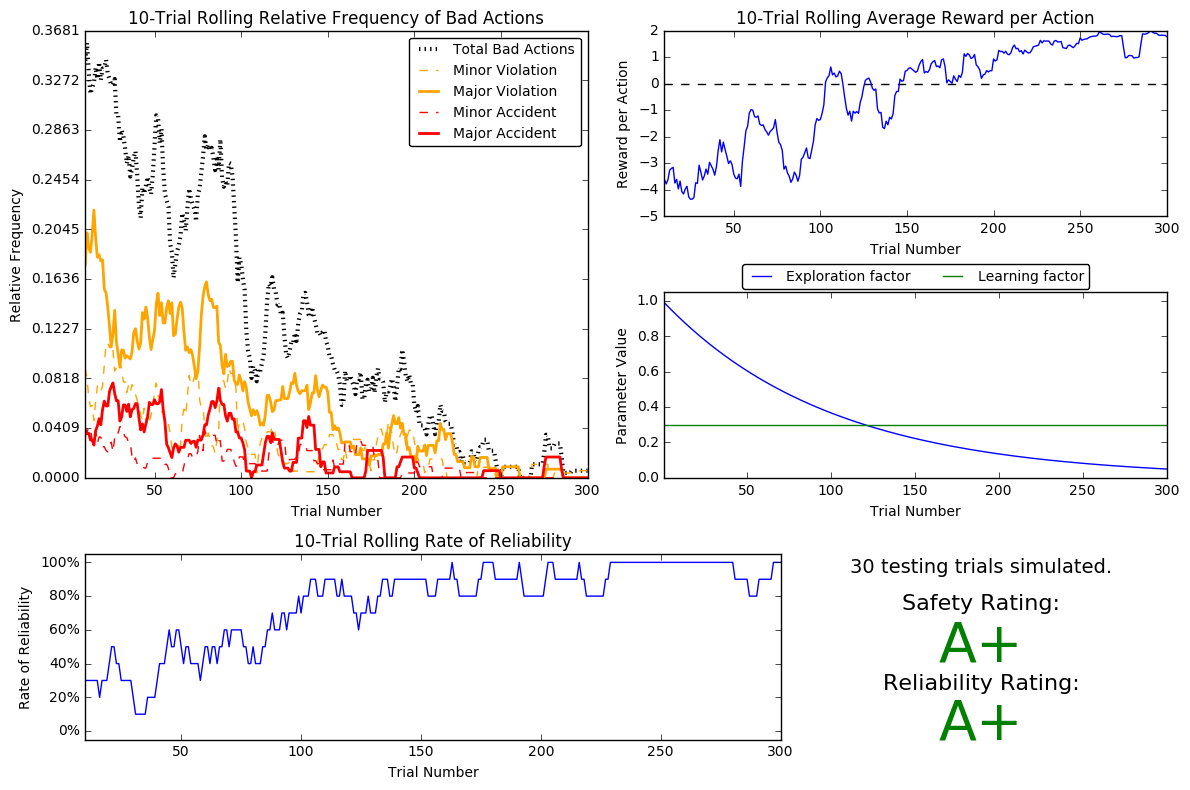

In [9]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:** The decaying function used was $\epsilon(t) = e^{-at}$ where $a = 0.01$.

The number of training trials before begining testing was about 300. This was chosen by trial and error. It can be noted that the number of trials is completely determined when choosing the decaying function and the epsilon-tolerance. In particular it doesn't depend on any performance metrics.

The epsilon-tolerance was left unchanged and equal to 0.05, because I considered that a 5% of random actions for learning is already low enough, so that not much learning is taking place. The value of alpha (learning rate), was set to 0.03. It was found that low values of alpha caused better final results, but not too low (between 0.02 and 0.03). High values were tested, as well as the original 0.5 value. I assume that the low alpha values allow for many different measurements of reward to influence the final outcome (not only the last ones), and so, if the training time is enough, shows better results. Of course, lower values of alpha require lower values of "a", to increase the training time.

The Safety and Reliability Ratings improved from "B,B" to "A+,A+" since the default Q-learner from the previous section. In the training trials, it can be seen that the mean reward seems to converge to 2 on the optimized learner, while in the default learner it reached a value of 0 (and didn't seem to be converging yet, possibly due to the small amount of training trials). The amount of bad actions went low, from about 15% to about 3%, in the final training trials (in the testing trials it is expected to be even lower).

I think that the Q-Learner results show that the driving agent successfully learned an appropriate policy.

The safety and reliability ratings of the Smarcab are the best possible in the scale, so I think it is right to be satisfied with them. It has to be noted that this result is not the same always, I have seen some A,A+ or A+,A results with this Q-Learner, but I think it is good enough for the intended application (of course in a real application the required reliability and safety could be much more restrictive, but in that case the ratings scale should be chosen differently).

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** The state was defined to be: $s=(waypoint, light, left, oncoming)$.

Some examples of an optimal policy would be (I will use "X" for "anything/doesn't matter"):
- (forward, green, X, X) -> forward
- (right, green, X, X) -> right
- (left, green, X, left) -> left
- (left, green, X, forward) -> None
- (left, green, X, right) -> None
- (forward, red, X, X) -> None
- (right, red, left, X) -> right
- (left, red, X, X) -> None
- (left, green, X, None) -> left

The learned policy is not correct for all the states recorded from the simulation. For example the ones below are not right: 

- (left,red,right,left) -> right ; It has a 0.0 in the Q-value for 'None', which probably means that it never tried it.

- (right,green,forward,right) -> None (probability = 50%), right (probability = 50%) ; Both values have a 0.0 Q-value.

Some states are not "complete", that is, they have some "0.0" values (which is presumably because the action was never tried in that state). That tends to happen more often in states that require both a car on the left and a car oncoming, to be defined. Those states are less likely to happen than the ones with a car at just one of those positions. Increasing "num_dummies" could solve that, to a certain point.

After seeing those results it is clear that the algorithm doesn't capture the policy perfectly.

One example of state/action/rewards can be seen below:

('left', 'green', 'forward', 'left')
 -- None : 0.35
 -- forward : 0.37
 -- right : 0.75
 -- left : 2.05
 
 The action chosen would be "left". That is correct because it is permited to turn left, with a green light, if the oncoming car is not going forward or right (it is going left on this case). It can be noted that the other actions have positive rewards, as they are "legal", but the most rewarding is the desired one (following the waypoint).

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:** I think the characteristic that has to do with the environment would be that the "dummy agents" are distributed randomly and uniformly, and act randomly and uniformly. The streets are all identical also. That means that, other than the "follow the next waypoint" rule, there is no reason to prefer one path over another, statistically. The smartcab could learn something inside one trial, about the specific configuration on that trial, but that is not too useful (trials have short duration, and the idea is to learn something general about driving; it could even negatively affect future trials).

The characteristic that has to do with the Smarcab itself may be that it stores no information about the topology of the map and, in particular, doesn't know where the goal is located. The goal is also changed randomly in every trial, so whatever information it would get from previous trials is useless, at best.
If the car knew something about the topology, it could also make some predictions about future traffic, and try to avoid concentrations. That is, given certain seen "trafic patterns" on the current and past crossings, it could "predict" to some extent the traffic in the crossing nearby.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.